In [1]:
import numpy as np
import pandas as pd

import os
import shutil
print(os.listdir("D://histopathologic-cancer-detection"))

from glob import glob 
from skimage.io import imread
import gc

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

['sample_submission.csv', 'test', 'train', 'train_labels.csv']


Using TensorFlow backend.
c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\dzhal\anaco

In [2]:
smth_base = "D://histopathologic-cancer-detection/"
base_tile_dir = smth_base + 'train/'
df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.tif'))})
df['id'] = df.path.map(lambda x: x.split('/')[3].split("\\")[1].split(".")[0])

labels = pd.read_csv(smth_base + "train_labels.csv")
# print(labels)
df_data = df.merge(labels, on = "id")
# print(df_data.head())

df_data = df_data[df_data['id'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']

df_data = df_data[df_data['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']
df_data.head(3)

,path,id,label
0,D://histopathologic-cancer-detection/train\000...,00001b2b5609af42ab0ab276dd4cd41c3e7745b5,1
1,D://histopathologic-cancer-detection/train\000...,000020de2aa6193f4c160e398a8edea95b1da598,0
2,D://histopathologic-cancer-detection/train\000...,00004aab08381d25d315384d646f5ce413ea24b1,0


In [3]:
SAMPLE_SIZE = 80000 

df_0 = df_data[df_data['label'] == 0].sample(SAMPLE_SIZE, random_state = 101)
df_1 = df_data[df_data['label'] == 1].sample(SAMPLE_SIZE, random_state = 101)

df_data = shuffle(pd.concat([df_0, df_1], axis=0).reset_index(drop=True))

y = df_data['label']
df_train, df_val = train_test_split(df_data, test_size=0.10, random_state=101, stratify=y)
print(df_data)

# Create directories
train_path = 'base_dir/train'
valid_path = 'base_dir/valid'
test_path = smth_base + 'test'
for fold in [train_path, valid_path]:
    for subf in ["0", "1"]:
        os.makedirs(os.path.join(fold, subf))

                                                     path  \
159832  D://histopathologic-cancer-detection/train\956...   
4138    D://histopathologic-cancer-detection/train\026...   
104290  D://histopathologic-cancer-detection/train\320...   
157950  D://histopathologic-cancer-detection/train\49f...   
17070   D://histopathologic-cancer-detection/train\b3f...   
61202   D://histopathologic-cancer-detection/train\f6b...   
17307   D://histopathologic-cancer-detection/train\9aa...   
94505   D://histopathologic-cancer-detection/train\3a5...   
156879  D://histopathologic-cancer-detection/train\4c5...   
137555  D://histopathologic-cancer-detection/train\f81...   
145614  D://histopathologic-cancer-detection/train\00c...   
66923   D://histopathologic-cancer-detection/train\7ea...   
21439   D://histopathologic-cancer-detection/train\d0f...   
53896   D://histopathologic-cancer-detection/train\f2f...   
21391   D://histopathologic-cancer-detection/train\58e...   
106493  D://histopatholo

FileExistsError: [WinError 183] Невозможно создать файл, так как он уже существует: 'base_dir/train\\0'

In [4]:
df_data.set_index('id', inplace=True)
df_data.head()
df_train

,path,id,label
73387,D://histopathologic-cancer-detection/train\30d...,30d4dbac045d934d89933fe72ada65f3b19be929,0
72423,D://histopathologic-cancer-detection/train\354...,354c09d2bf75919bac342f0b04d99555a9690b92,0
70542,D://histopathologic-cancer-detection/train\c82...,c82a30f53876925ef720c06b9cbdfc9afb23e286,0
111161,D://histopathologic-cancer-detection/train\931...,931b8c14e75d141311b7c556c47ed17810b0a254,1
131392,D://histopathologic-cancer-detection/train\ebf...,ebfffd1ff3b89beefb7976e8b90f73e6a3b651c9,1
38347,D://histopathologic-cancer-detection/train\915...,91529723208fcc044e9431581e736e155d8f8167,0
64333,D://histopathologic-cancer-detection/train\349...,34905fc041f4e7a34d72bcadc428b9b3bb8a23fc,0
102694,D://histopathologic-cancer-detection/train\8f3...,8f362706ccc1d5ddb89b55a343c4bec4f08e2b66,1
122272,D://histopathologic-cancer-detection/train\611...,611f787877b2d1b15da276f3b52e39e3927ec656,1
660,D://histopathologic-cancer-detection/train\24a...,24a13ebb9ba9484e534323e9b1c64dc8cbd21c2d,0


In [5]:
df_train

,path,id,label
73387,D://histopathologic-cancer-detection/train\30d...,30d4dbac045d934d89933fe72ada65f3b19be929,0
72423,D://histopathologic-cancer-detection/train\354...,354c09d2bf75919bac342f0b04d99555a9690b92,0
70542,D://histopathologic-cancer-detection/train\c82...,c82a30f53876925ef720c06b9cbdfc9afb23e286,0
111161,D://histopathologic-cancer-detection/train\931...,931b8c14e75d141311b7c556c47ed17810b0a254,1
131392,D://histopathologic-cancer-detection/train\ebf...,ebfffd1ff3b89beefb7976e8b90f73e6a3b651c9,1
38347,D://histopathologic-cancer-detection/train\915...,91529723208fcc044e9431581e736e155d8f8167,0
64333,D://histopathologic-cancer-detection/train\349...,34905fc041f4e7a34d72bcadc428b9b3bb8a23fc,0
102694,D://histopathologic-cancer-detection/train\8f3...,8f362706ccc1d5ddb89b55a343c4bec4f08e2b66,1
122272,D://histopathologic-cancer-detection/train\611...,611f787877b2d1b15da276f3b52e39e3927ec656,1
660,D://histopathologic-cancer-detection/train\24a...,24a13ebb9ba9484e534323e9b1c64dc8cbd21c2d,0


In [31]:
for image in df_train['id'].values:
    fname = image + '.tif'
    label = str(df_data.loc[image,'label']) # get the label for a certain image
    src = os.path.join(smth_base + 'train', fname)
    dst = os.path.join(train_path, label, fname)
    shutil.copyfile(src, dst)

for image in df_val['id'].values:
    fname = image + '.tif'
    label = str(df_data.loc[image,'label']) # get the label for a certain image
    src = os.path.join(smth_base + 'train', fname)
    dst = os.path.join(valid_path, label, fname)
    shutil.copyfile(src, dst)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 96
num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 32
val_batch_size = 32

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

datagen = ImageDataGenerator(preprocessing_function=lambda x:(x - x.mean()) / x.std() if x.std() > 0 else x,
                            horizontal_flip=True,
                            vertical_flip=True)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='binary')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='binary')


test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='binary',
                                        shuffle=False)

Found 144000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras_radam import RAdam

kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.5

model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(second_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(third_filters, kernel_size, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(1, activation = "sigmoid"))

# Compile the model
model.compile(RAdam(0.01), loss = "binary_crossentropy", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 92, 92, 32)        9216      
_________________________________________________________________
batch_normalization_19 (Batc (None, 92, 92, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 92, 92, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 44, 44, 64)        18432     
__________

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
checkpoint_path = 'C:/Users/dzhal/new/cpWithRAdam.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(
checkpoint_path, verbose=1, save_weights_only=True,
# Сохраняем веса через каждые 5 эпох
period=1, save_best_only=True)

earlystopper = EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)
reducel = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=1, factor=0.1)
history = model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=13,
                   callbacks=[reducel, earlystopper, cp_callback])

Instructions for updating:
Use tf.cast instead.
Epoch 1/13
4500/4500 [==============================] - 5116s 1s/step - loss: 0.4164 - acc: 0.8167 - val_loss: 0.5921 - val_acc: 0.7359

Epoch 00001: val_loss improved from inf to 0.59215, saving model to C:/Users/dzhal/new/cpWithRAdam.ckpt
Epoch 2/13
4500/4500 [==============================] - 2647s 588ms/step - loss: 0.3295 - acc: 0.8633 - val_loss: 0.2721 - val_acc: 0.8941

Epoch 00002: val_loss improved from 0.59215 to 0.27213, saving model to C:/Users/dzhal/new/cpWithRAdam.ckpt
Epoch 3/13
 273/4500 [>.............................] - ETA: 43:45 - loss: 0.3063 - acc: 0.8736

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110713). Check your callbacks.
  % delta_t_median)


 904/4500 [=====>........................] - ETA: 35:06 - loss: 0.2981 - acc: 0.8788

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100745). Check your callbacks.
  % delta_t_median)


 906/4500 [=====>........................] - ETA: 35:06 - loss: 0.2983 - acc: 0.8787

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102726). Check your callbacks.
  % delta_t_median)


 907/4500 [=====>........................] - ETA: 35:05 - loss: 0.2986 - acc: 0.8787

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.108211). Check your callbacks.
  % delta_t_median)


2812/4500 [=================>............] - ETA: 16:15 - loss: 0.2943 - acc: 0.8808

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101726). Check your callbacks.
  % delta_t_median)


2813/4500 [=================>............] - ETA: 16:14 - loss: 0.2942 - acc: 0.8809

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111203). Check your callbacks.
  % delta_t_median)


2815/4500 [=================>............] - ETA: 16:13 - loss: 0.2942 - acc: 0.8809

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.112715). Check your callbacks.
  % delta_t_median)


2818/4500 [=================>............] - ETA: 16:12 - loss: 0.2942 - acc: 0.8809

c:\users\dzhal\anaconda3\envs\neural_network\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102258). Check your callbacks.
  % delta_t_median)


4500/4500 [==============================] - 5373s 1s/step - loss: 0.2896 - acc: 0.8832 - val_loss: 0.3811 - val_acc: 0.8407

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00003: val_loss did not improve from 0.27213
Epoch 4/13
4500/4500 [==============================] - 4117s 915ms/step - loss: 0.2379 - acc: 0.9071 - val_loss: 0.2126 - val_acc: 0.9137

Epoch 00004: val_loss improved from 0.27213 to 0.21256, saving model to C:/Users/dzhal/new/cpWithRAdam.ckpt
Epoch 5/13
2640/4500 [================>.............] - ETA: 38:57 - loss: 0.2248 - acc: 0.9122

In [14]:
import matplotlib.pyplot as plt
model.load_weights("C:/Users/dzhal/new/cp.ckpt")
# make a prediction
y_pred_keras = model.predict_generator(test_gen, steps=len(df_val), verbose=1)


16000/16000 [==============================] - 741s 46ms/step


In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_gen.classes, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9546039374999999

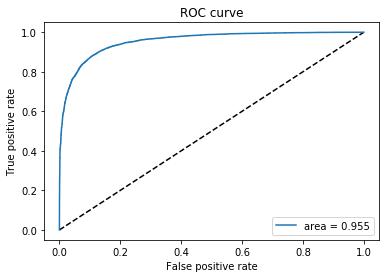

In [16]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:

model.fit_generator(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=5,
                   callbacks=[ earlystopper, cp_callback])